In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 20.0)

##PROCESSING IMAGE

### read

In [2]:
''' Upload and Read image Poppy.jpg '''
image = cv.imread("Poppy.jpg")

### size

In [3]:
''' print image size '''
print(np.shape(image))

''' resize the image to 1/4 '''
image = cv.resize(image, (image.shape[0] // 4, image.shape[1]// 4))



''' print new size of image '''
print(np.shape(image))

(7314, 7726, 3)
(1931, 1828, 3)


### channels

In [4]:
''' set channels of loaded image to rgb '''
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
''' grayscale '''
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
''' whiten the red channel '''
no_red = np.copy(image)
no_red[:,:, 0] = 255

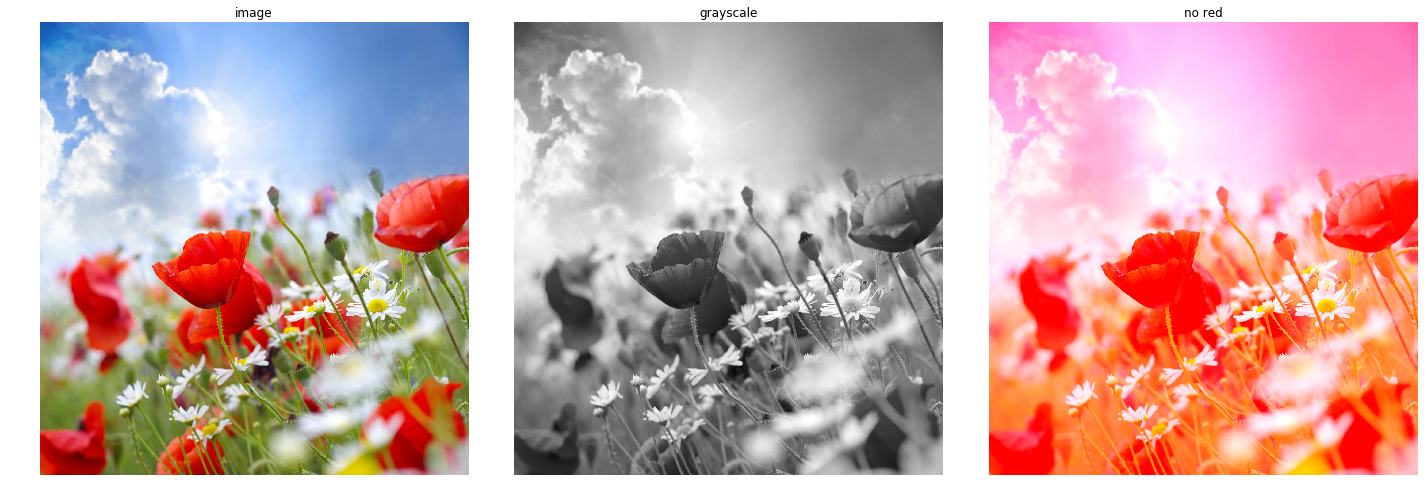

In [10]:
''' Show rgb, gray, and no_red images '''
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.subplot(1,3,1).axis("off")
plt.tight_layout()
plt.imshow(image)
plt.title("image")

plt.subplot(1,3,2).axis("off")
plt.tight_layout()
plt.imshow(gray, cmap="gray")
plt.title("grayscale")

plt.subplot(1,3,3).axis("off")
plt.tight_layout()
plt.imshow(no_red)
plt.title("no red")
plt.show()
    
  

## CONVOLUTION

### kernel

In [5]:
''' kernels for convolution '''
x_sobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
y_sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

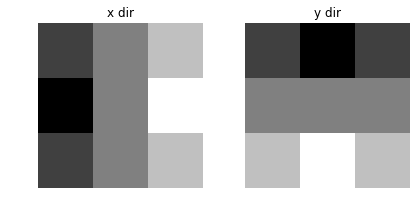

In [6]:
''' show kernels '''

ax = plt.subplot(1,2,1).axis("off")
plt.tight_layout()
plt.imshow(x_sobel, cmap="gray")
plt.title("x dir")

plt.subplot(1,2,2).axis("off")
plt.tight_layout()
plt.imshow(y_sobel, cmap="gray")
plt.title("y dir")


plt.show()


### padding function

In [7]:
''' this function takes image and padding size to pad the image by zeros '''

def padding(img, k):
  return np.pad(img, ((k ,k), (k, k)), "constant")

def padding_without_prewritten_function(img, k):
    padded = np.zeros((2 * k + img.shape[0], 2 * k + img.shape[1]))
    padded[k: k + img.shape[0], k: k+ img.shape[1]] = img
    return padded
    
    

In [8]:
padded = padding(gray, 1)

###convolution function:


convolve gray image and padded image (k=1) using both x_sobel and y_sobel kernels and plot them using plt

In [9]:
''' this function takes grayscale image and filter to convolve image by filter '''
def conv2d(img, filter):
    x = img.shape[0]
    y = img.shape[1]

    x_f = filter.shape[0]
    y_f = filter.shape[1]

    conv_num_x = x - x_f + 1
    conv_num_y = y - y_f + 1

    res = np.zeros((conv_num_x, conv_num_y))

    for i in range(conv_num_x):
        for j in range(conv_num_y):
            block = img[i : i + x_f, j : j + y_f].flatten()
            c = np.dot(block, filter.flatten())
            res[i,j] = c

    return res



In [10]:
filtered_x = conv2d(gray, x_sobel)
print("done")
filtered_y = conv2d(gray, y_sobel)
print("done")
padded_x = conv2d(padded, x_sobel)
print("done")
padded_y = conv2d(padded, y_sobel)
print("done")


done
done
done
done


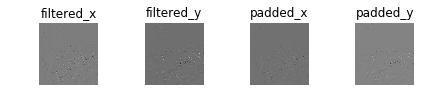

In [11]:

plt.subplot(1,4,1).axis("off")
plt.tight_layout()
plt.imshow(filtered_x,  cmap="gray")
plt.title("filtered_x")

plt.subplot(1,4,2).axis("off")
plt.tight_layout()
plt.imshow(filtered_y, cmap="gray")
plt.title("filtered_y")

plt.subplot(1,4,3).axis("off")
plt.tight_layout()
plt.imshow(padded_x, cmap="gray")
plt.title("padded_x")

plt.subplot(1,4,4).axis("off")
plt.tight_layout()
plt.imshow(padded_y, cmap="gray")
plt.title("padded_y")
plt.show()
    

### opencv convolution

convolve gray image using both kernels

In [43]:
''' Convolve image using opencv '''
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)


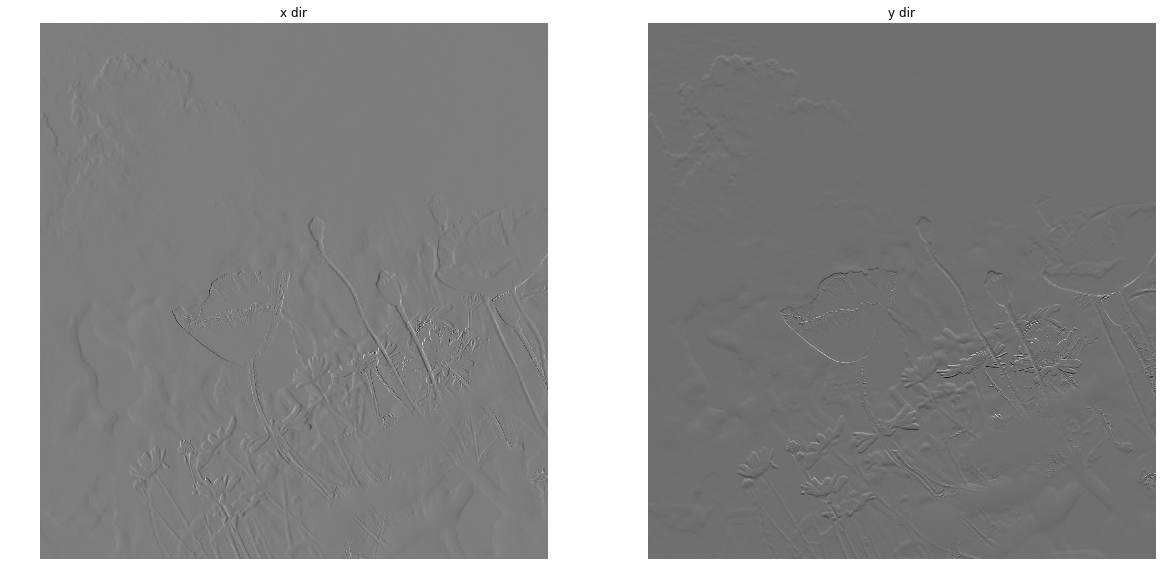

In [45]:
''' show 2 resulting images '''
ax = plt.subplot(1,2,1).axis("off")

plt.imshow(sobelx, cmap="gray")
plt.title("x dir")

plt.subplot(1,2,2).axis("off")

plt.imshow(sobely, cmap="gray")
plt.title("y dir")


plt.show()



**GOOD JOB :)**


